In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/abusive_text.csv')
df.head()

,label,text
0,0,भीड़ में बहुत हब्सी मिलेंगे
1,0,साले बेवकूफ अपनी मां मक्खियां तो हटा दें
2,0,बुर देदो तो मुह में लंड ले लो तो
3,0,कुत्ता वहा है चिल्ला तू क्यों रहा है
4,1,चाय नहीं पीता हूं मैं इसी को छोड़ दिया ok


<Figure size 800x600 with 0 Axes>

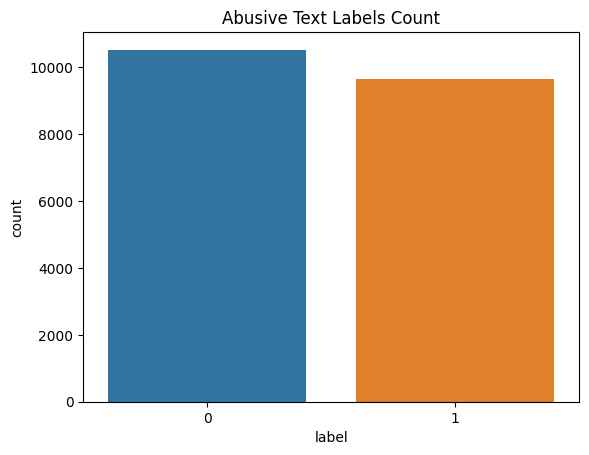

<Figure size 800x600 with 0 Axes>

In [ ]:
sns.countplot(x='label', data=df)
plt.title('Abusive Text Labels Count')
plt.figure(figsize=(8,6))

# Pre-processing

- Removing the **stop words** first followed by **symbols** and then finally repeat stopword removal as few words might still have an **apostrophe** that are not stopwords.

- **Single characters** are not much useful in knowing the importance of the document and few final single characters might be irrelevant symbols, so it is always good to remove the single characters.

- **stemming** converts words to their stem. For example, playing and played are the same type of words that basically indicate an action play.

- **Lemmatisation** is a way to reduce the word to the root synonym of a word. Lemmatisation makes sure that the reduced word is again a dictionary word (word present in the same language). 



In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = ['हूँ', 'हो','हूं', 'मैं','में','तू', 'है', 'हैं','अथव', 'अद', 'अध', 'अन', 'अपन', 'अभ', 'अल', 'आग', 'आद', 'आपक', 'इत', 'इतय', 'इनक', 'इनस', 'इसक', 'इसम', 'इसल', 'उनक', 'उनस', 'उसक', 'एव', 'ऐस', 'कभ', 'करत', 'करन', 'कह', 'कहत', 'गय', 'जबक', 'जर', 'जह', 'झक', 'तथ', 'तन', 'तर', 'दब', 'दर', 'दव', 'धर', 'नक', 'नस', 'नह', 'पड', 'पहल', 'बड', 'बन', 'बह', 'यत', 'यद', 'यम', 'रख', 'रत', 'रव', 'रह', 'रहत', 'लक', 'वग', 'वय', 'वर', 'वग़', 'सक', 'सकत', 'सबस', 'सभ', 'सम', 'सर', 'सस', 'हमन', 'हर', 'था', 'दें', 'थी','ले', 'लो', 'थे', 'होगा', 'होगी', 'होंगे', 'ख़ास', 'बहुत', 'बार', 'वाले', 'वाली', 'वाला', 'जब', 'जहाँ', 'जा', 'जिस', 'जिन्हें', 'जिन्हों', 'जिसे', 'जिसका', 'जिसकी','जिसके', 'जिसमें', 'जिधर', 'के', 'का', 'की', 'को', 'कि', 'इस', 'उस', 'उसे', 'उन', 'उन्हें', 'उन्हों', 'उनका', 'उनकी', 'उनके','उनसे', 'अपना', 'अपनी', 'अपने', 'आदि', 'इत्यादि', 'इन्हें', 'इन्हों', 'इनका', 'इनकी', 'इनके', 'इनसे', 'जैसा', 'जैसे','अंदर', 'अत', 'अदि', 'अप', 'अपना', 'अपनि', 'अपनी', 'अपने', 'अभि', 'अभी', 'आदि', 'आप', 'इंहिं', 'इंहें', 'इंहों', 'इतयादि', 'इत्यादि', 'इन', 'इनका', 'इन्हीं', 'इन्हें', 'इन्हों', 'इस', 'इसका', 'इसकि', 'इसकी', 'इसके', 'इसमें', 'इसि', 'इसी', 'इसे', 'उंहिं', 'उंहें', 'उंहों', 'उन', 'उनका', 'उनकि', 'उनकी', 'उनके', 'उनको', 'उन्हीं', 'उन्हें', 'उन्हों', 'उस', 'उसके', 'उसि', 'उसी', 'उसे', 'एक', 'एवं', 'एस', 'एसे', 'ऐसे', 'ओर', 'और', 'कइ', 'कई', 'कर', 'करता', 'करते', 'करना', 'करने', 'करें', 'कहते', 'कहा', 'का', 'काफि', 'काफ़ी', 'कि', 'किंहें', 'किंहों', 'कितना', 'किन्हें', 'किन्हों', 'किया', 'किर', 'किस', 'किसि', 'किसी', 'किसे', 'की', 'कुछ', 'कुल', 'के', 'को', 'कोइ', 'कोई', 'कोन', 'कोनसा', 'कौन', 'कौनसा', 'गया', 'घर', 'जब', 'जहाँ', 'जहां', 'जा', 'जिंहें', 'जिंहों', 'जितना', 'जिधर', 'जिन', 'जिन्हें', 'जिन्हों', 'जिस', 'जिसे', 'जीधर', 'जेसा', 'जेसे', 'जैसा', 'जैसे' , 'तैसा', 'तैसे', 'इसलिए', 'इसके अलावा', 'फिर', 'अगर', 'कि', 'की', 'के बारे में', 'किसी तरह', 'कोई', 'कुछ', 'कुल','जितना', 'तक', 'तो', 'थी', 'थे', 'था', 'ने', 'पर', 'जा', 'जो', 'सबसे', 'संग','से', 'तक', 'साथ', 'ही', 'हुआ', 'हुई', 'हुए', 'होता', 'होती', 'ह']
# remove duplicate stop words
stop_set = set()
for word in stop_words:
  stop_set.add(word)
print("No. of stop words: ", len(stop_set))

No. of stop words:  235


In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/final_stopwords.txt', 'r', encoding='utf8') as file:
    for line in file:
        word = line.strip()  # remove newline character from the end of the line
        stop_set.add(word)  # add the word to the set
print("No. of stop words: ", len(stop_set))

No. of stop words:  422


In [ ]:
def remove_stopwords_hindi(text):
    tokens = word_tokenize(text)
    # print(tokens)
    filtered_tokens = [word for word in tokens if word not in stop_set]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

def remove_stopwords_english(text):
    tokens = word_tokenize(text)
    # print(tokens)
    filtered_tokens = [word for word in tokens if word not in set(stopwords.words('english'))]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

In [ ]:
# removing digits from text
# df['text'] = df['text'].str.replace('\d+', '')

In [ ]:
# removing punctuations
def remove_punctuations(text):
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    return text

In [ ]:
# # tokenize and check unique words
def tokenize_unique_save(col):
  unique = set()
  for cell in col:
    tokens = word_tokenize(cell)
    for token in tokens:
      unique.add(token)
  return unique

# unique_list = list()
# with open('/content/drive/MyDrive/Colab Notebooks/unique.txt', 'w') as file:
#   for word in tokenize_unique_save(df['text']):
#     file.write(str(word)+'\n')
#   file.close()

# print(tokenize_unique_save(df['text']))

{'दौगले', 'गंभीर', 'नवाब', 'की💐', 'शौऔशन', '🚨🚨', 'लेते🌿🌿🌿🌿🌿🌿🌿🌿🌿🌿🌿🌿🌿🌿🌹🌹🌹🌹🌹🌹🌹🌹🌹🌹🌹👌👌👌👌👌', 'आजचे', 'धंनबाद', '❤❤अच्छा', 'ढेडी़', 'असार', '1', 'कूडा', 'कहुगी', 'बड़ा', 'जहाँ', 'दिखायेगा', 'राउत', 'चोट', 'प्योर', '🏞️कैसे', 'तड़पो', 'सोमनाथ', 'ब्रिटेन', 'सॉफ्टवेअर', ',विक्की', 'हो☺🙂', '😁😁तुम', 'mauga', 'खेलें', 'साफ-साफ', 'है🙈🙈🙈', 'जी।👍', 'ड्यूट', 'बैलेंस', 'भावी', 'बिकता🔢', 'मूंह', 'ऊभी', 'अंधभक्\u200dत', 'छोड़दुऊ', '04', 'निजात', 'मान', 'चांडाल', 'अंग्रेजो', 'प्रोडक्ट', '_Son', '👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌', 'दिन-ब-दिन', 'सेतियाप', '🎆🎆🎊🎉🎉', 'बोलत', '।उसके', '😎👈🏻ये', 'गवर्मेंट', 'ধুপ', 'भुंकणे', 'चुकीचा', 'पिल्लै', 'बाड़ू', 'छठी', 'कुर्ला', 'वायरस', 'स्लोगन', 'तुक्ष', 'चढावे', 'बुझाने', 'namnCDS', 'रातों', '😎फिर', 'भावे', 'बिहाव', 'बेजान', 'अलाव', 'तोपों', 'बुद्धू', 'बॉस', 'नतीजा', 'फ्रेड', 'प्यारे_नही', 'अध्यापक', 'अनफॉलो', 'मफियाओ', 'JI', 'फेमिली', 'मतल्ब', 'पावडर', 'बिजनस', 'fack', '.भारत', 'kaha', '😎👦', 'चलाता', 'लगेगा।', 'रिया', 'कप्तान', 'ऑनलाइन', 'कन्नौज', '________😜😝😜__________', 'आदरणीय', 'चिड़य

# Cleaning up text

In [ ]:
!pip install indic_transliteration emot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.3/143.3 KB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 KB 7.5 MB/s eta 0:00:00


In [ ]:
from indic_transliteration import sanscript
from indic_transliteration.sanscript import transliterate

# Define preprocessing functions
def preprocess_hindi_text(text):
    # Remove unnecessary symbols
    text = re.sub(r'[^\u0900-\u097F\s]', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text)
    # Remove leading/trailing spaces
    text = text.strip()
    # Convert to lowercase
    text = text.lower()
    return text

def transliterate_hindi(text):
    # Transliterate Hindi text to English
    english_text = transliterate(text, sanscript.DEVANAGARI, sanscript.ITRANS)
    return english_text.lower()

import unicodedata

def extract_emojis(text):
    # Extract emojis from text
    emojis = ''.join(c for c in text if c in ''.join(chr(i) for i in range(0x1F300, 0x1F6FF+1)))
    return emojis

def extract_raw_english(text):
    # Remove unnecessary symbols
    text = re.sub(r'[^a-z^A-Z]', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text)
    # Remove leading/trailing spaces
    text = text.strip()
    # Convert to lowercase
    text = text.lower()
    return text

In [ ]:
from emot.emo_unicode import UNICODE_EMOJI
 # Function for converting emojis into word
def convert_emojis(text):
    for e in UNICODE_EMOJI:
        text = text.replace(e, (UNICODE_EMOJI[e]+' ').replace(':',''))
    return text

convert_emojis('😍😎👸👈🎠👫👸👈👗💃👀👩😋😍👈👸👰 पगली बहोत शोकीन तुजे डोली बिठाके लेके तेरे कपड़...')

'smiling_face_with_heart-eyes smiling_face_with_sunglasses princess backhand_index_pointing_left carousel_horse woman_and_man_holding_hands princess backhand_index_pointing_left dress woman_dancing eyes woman face_savoring_food smiling_face_with_heart-eyes backhand_index_pointing_left princess person_with_veil  पगली बहोत शोकीन तुजे डोली बिठाके लेके तेरे कपड़...'

In [ ]:
############################################################################# START PRE_PROCESSING ###################################################################################

# remove punctuation from text
df['Clean Text'] = df['text'].apply(remove_punctuations)
# df['Clean English Text'] = df['Raw English Text'].apply(remove_punctuations)

# convert emoji to text
df['Clean Text'] = df['Clean Text'].apply(convert_emojis)

# remove digits from text
df['Clean Text'] = df['Clean Text'].str.replace('\d+',' ')

# separate out hindi, raw english and emoji
# df['Clean Hindi Text'] = df['Clean Text'].apply(preprocess_hindi_text)
# df['Clean English Text'] = df['Clean Text'].apply(extract_raw_english)
# df['Emojis'] = df['text'].apply(extract_emojis)

# remove digits from both
# df['Clean Hindi Text'] = df['Clean Hindi Text'].str.replace('\d+', ' ')
# df['Clean English Text'] = df['Clean English Text'].str.replace('\d+', ' ')

# remove stop words from hindi
df['Clean Text'] = df['Clean Text'].apply(remove_stopwords_hindi)

# # remove stop words from english
# df['Clean English Text'] = df['Clean English Text'].apply(remove_stopwords_english)

# convert hindi to english
# df['Hinglish Text'] = df['Clean Hindi Text'].apply(transliterate_hindi)

# testing text
# df['Trial'] = df['Clean English Text'] + ' ' + df['Emojis'] + ' ' + df['Clena Hindi Text']

# concate hinglish + english + emoji
# df['final_text'] = df['Clean English Text'] + ' ' + df['Clean Hindi Text']

df['final_text'] = df['Clean Text']

df.head(10)

<ipython-input-12-7e7a41e6bdb5>:11: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Clean Text'] = df['Clean Text'].str.replace('\d+',' ')


,label,text,Clean Text,final_text
0,0,भीड़ में बहुत हब्सी मिलेंगे,भीड़ हब्सी मिलेंगे,भीड़ हब्सी मिलेंगे
1,0,साले बेवकूफ अपनी मां मक्खियां तो हटा दें,साले बेवकूफ मां मक्खियां हटा,साले बेवकूफ मां मक्खियां हटा
2,0,बुर देदो तो मुह में लंड ले लो तो,बुर देदो मुह लंड,बुर देदो मुह लंड
3,0,कुत्ता वहा है चिल्ला तू क्यों रहा है,कुत्ता वहा चिल्ला,कुत्ता वहा चिल्ला
4,1,चाय नहीं पीता हूं मैं इसी को छोड़ दिया ok,चाय पीता छोड़ ok,चाय पीता छोड़ ok
5,0,"बैंकों से सरकार का रिश्ता दलाली का है, बड़े बड...",बैंकों सरकार रिश्ता दलाली चोरों लोन दिलाने एवज...,बैंकों सरकार रिश्ता दलाली चोरों लोन दिलाने एवज...
6,0,#पगली 😍 हम तो #बहोत 😎 _शोकीन हैं 👸👈 #तुजे डोली...,पगली smiling_face_with_heart-eyes बहोत smiling...,पगली smiling_face_with_heart-eyes बहोत smiling...
7,0,ohh my god . यहां इतने सारे चमचे इसका मतलब जलन...,ohh my god इतने चमचे मतलब जलनखोरो कमी नही,ohh my god इतने चमचे मतलब जलनखोरो कमी नही
8,1,आप मेरे कमेंट का इतना इंतजार क्यों करते है,मेरे कमेंट इतना इंतजार,मेरे कमेंट इतना इंतजार
9,0,भोसड़ी को बात करने दो,भोसड़ी बात,भोसड़ी बात


In [ ]:
df['Hinglish Text'] = df['text'].apply(transliterate_hindi)

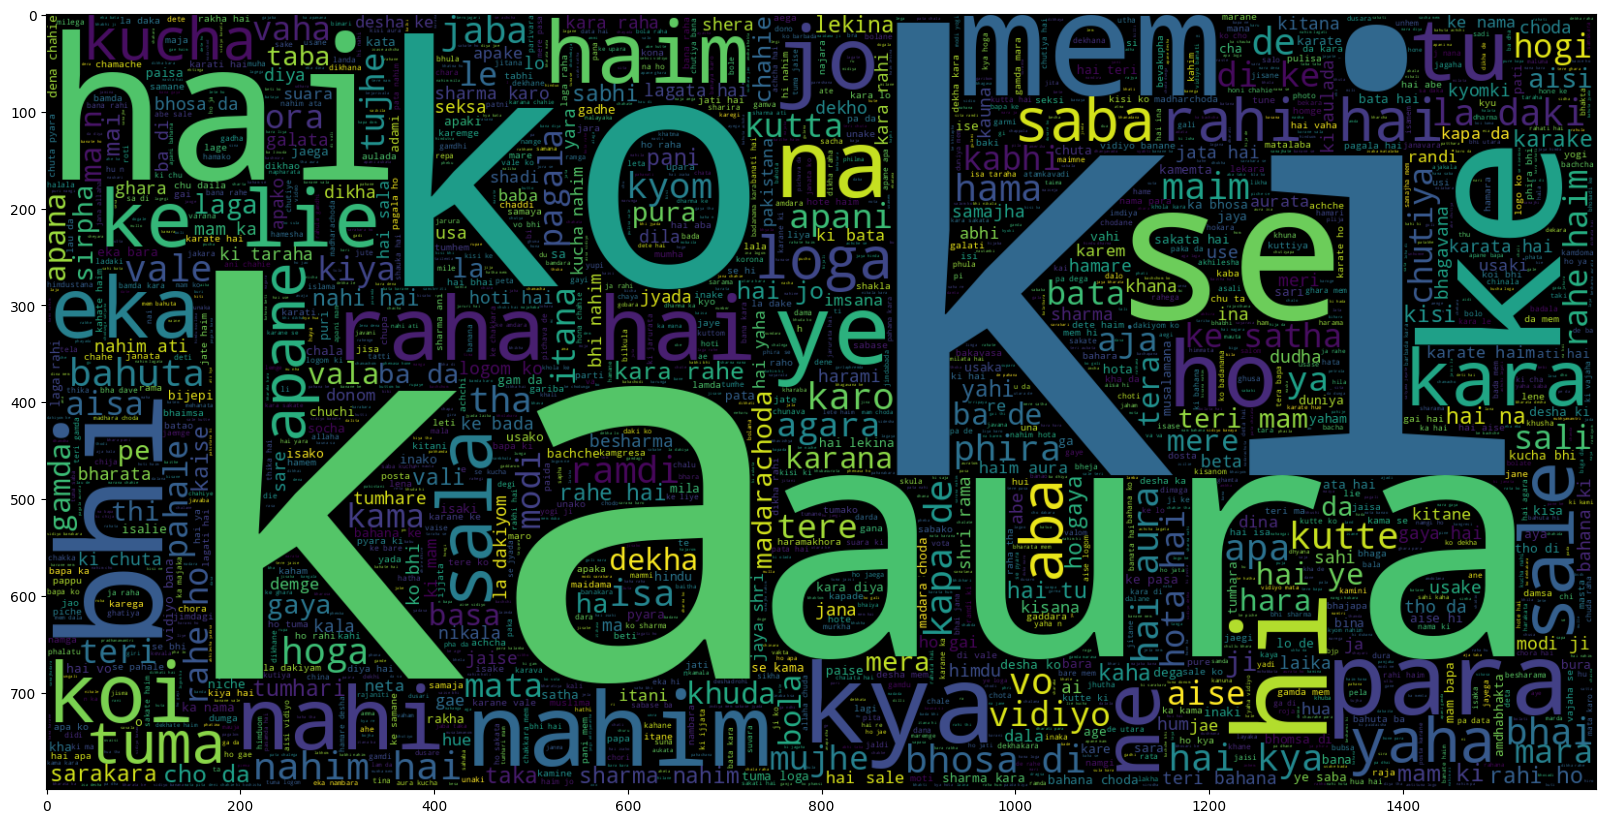

In [ ]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 5000 , width = 1600 , height = 800).generate(" ".join(df[df['label']==0]['Hinglish Text']))
plt.imshow(wc , interpolation = 'bilinear')

# TF-IDF and KNN

# TF-IDF

When we plan to vectorize documents, we cannot just consider the words that are present in that particular document. If we do that, then the vector length will be different for both the documents, and it will not be feasible to compute the similarity. So, what we do is that we vectorize the documents on the vocab. Vocab is the list of all possible worlds in the corpus.

We need the word counts of all the vocab words and the length of the document to compute TF

`tf(t,d) = count of t in d / number of words in d`

#### Document Frequency
This measures the importance of documents in a whole set of the corpus. This is very similar to TF but the only difference is that TF is the frequency counter for a term t in document d, whereas DF is the count of occurrences of term t in the document set N.

`df(t) = occurrence of t in N documents`

#### Inverse Document Frequency
IDF is the inverse of the document frequency which measures the informativeness of term t.

Now there are few other problems with the IDF, when we have a large corpus size say N=10000, the IDF value explodes. So to **dampen the effect we take the log of IDF.**

At query time, when the word is not present in is not in the vocab, it will simply be ignored. But in few cases, we use a fixed vocab and few words of the vocab might be absent in the document, in such cases, the *df will be 0.* As we cannot divide by 0, we **smoothen the value by adding 1 to the denominator.**

`idf(t) = log(N/(df + 1))`

#### TD-IDF

`tf-idf(t, d) = tf(t, d) * log(N/(df + 1))`


In [ ]:
def print_intersection_points(train_df, val_df, new_testdf):
  # Extract the column of interest from training and test dataframes
  train_col = set(train_df["text"])
  test_col = set(new_testdf["text"])

  # Count the number of common rows between the two dataframes
  common_rows = len(train_col.intersection(test_col))
  print("Number of common rows between train and test:", common_rows)

  # Extract the column of interest from validation and test dataframes
  valid_col = set(val_df["text"])

  # Count the number of common rows between the two dataframes
  common_rows = len(valid_col.intersection(test_col))
  print("Number of common rows between validation and test:", common_rows)

In [ ]:
# Split dataset into training and validation sets
train_df, val_df = train_test_split(df, test_size=0.2)

# Convert text data to TF-IDF vectors
vectorizer = TfidfVectorizer(sublinear_tf=True, smooth_idf=True)

train_X = vectorizer.fit_transform(train_df['final_text'])
val_X = vectorizer.transform(val_df['final_text'])

# Convert labels to NumPy arrays
train_y = np.array(train_df['label'])
val_y = np.array(val_df['label'])

# Train KNN model on the training set
k = 18 # number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(train_X, train_y)

# Evaluate KNN model on the validation set
print(classification_report(val_y, knn.predict(val_X)))

              precision    recall  f1-score   support

           0       0.67      0.50      0.57      2096
           1       0.58      0.74      0.65      1941

    accuracy                           0.61      4037
   macro avg       0.62      0.62      0.61      4037
weighted avg       0.63      0.61      0.61      4037



In [ ]:
from sklearn.metrics import accuracy_score, f1_score
best_acc = 0
best_k = 1
for k in range(1,51):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(train_X, train_y)
  y_pred = knn.predict(val_X)

  # Evaluate KNN model on the validation set
  acc = accuracy_score(val_y, y_pred)
  print("K:",k," Accuracy: ",acc, " Macro f1: ", f1_score(val_y, y_pred))
  if(acc > best_acc):
    best_acc = acc
    best_k = k

K: 1  Accuracy:  0.6232350755511519  Macro f1:  0.6491349480968858
K: 2  Accuracy:  0.6207579886054001  Macro f1:  0.5995291655767722
K: 3  Accuracy:  0.6170423581867723  Macro f1:  0.6570541259982253
K: 4  Accuracy:  0.6247213277186029  Macro f1:  0.637819746593354
K: 5  Accuracy:  0.609611097349517  Macro f1:  0.6582827406764962
K: 6  Accuracy:  0.6227396581620015  Macro f1:  0.6460608877527305
K: 7  Accuracy:  0.611097349516968  Macro f1:  0.6575043630017452
K: 8  Accuracy:  0.6207579886054001  Macro f1:  0.6511733880154933
K: 9  Accuracy:  0.6143175625464454  Macro f1:  0.6610058785107773
K: 10  Accuracy:  0.6242259103294525  Macro f1:  0.6568649626781271
K: 11  Accuracy:  0.6162992321030468  Macro f1:  0.6697932210616072
K: 12  Accuracy:  0.6281892494426554  Macro f1:  0.6674052736538888
K: 13  Accuracy:  0.6180331929650731  Macro f1:  0.6719148936170213
K: 14  Accuracy:  0.6222442407728511  Macro f1:  0.6653500109721308
K: 15  Accuracy:  0.6180331929650731  Macro f1:  0.671495526

In [ ]:
print("Best K:", best_k, "Best Acc: ", best_acc)

Best K: 18 Best Acc:  0.6497399058706961


In [ ]:
import pickle
knnPickle = open('knnpickle_file', 'wb') 
      
# source, destination 
pickle.dump(knn, knnPickle)  

# close the file

knnPickle.close()

##  Problems with normal neural network:

There are primarily two problems with this:

- Inputs and outputs do not have a fixed length, i.e., some input sentences can be of 10 words while others could be <> 10. The same is true for the eventual output
- We will not be able to share features learned across different positions of text if we use a standard neural network

# LSTM

Hidden state is known as Short term memory, and the cell state is known as Long term memory. 

![LSTM](https://av-eks-blogoptimized.s3.amazonaws.com/Screenshot-from-2021-03-16-13-45-35.png)

**A vocabulary or a dictionary:** This is a list of words that we use in our representations.
- The size of the vocabulary might vary depending on the application. One potential way of making a vocabulary is by picking up the most frequently occurring words from the training set.

In [ ]:
!pip install torchtext

In [ ]:
import torch
import torch.nn as nn
from torchtext import data
from torchtext import datasets
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torch.nn.utils.rnn import pad_sequence
from torch.autograd import Variable 
from tqdm import tqdm

from torchtext.data.utils import get_tokenizer
from collections import Counter
from torchtext.vocab import build_vocab_from_iterator

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [ ]:
# # creating vocab of the cleaned dataset
# vocab = set()

# for sentence in df['final_text']:
#   tokens = word_tokenize(sentence)
#   for word in tokens:
#     vocab.add(word)
# print("Vocab length: ", len(vocab))
# print(vocab)

In [ ]:
def build_vocab(data):
  for text in data:
        yield word_tokenize(text)

In [ ]:
# new df to generate vocab
df['Trial'] = df['text'].apply(remove_punctuations)
df['Trial'] = df['Trial'].apply(remove_stopwords_hindi)
# max sequence length
max_seq_length = 100
# build vocab
vocab = build_vocab_from_iterator(build_vocab(df['final_text']), specials=["UNK"])
# The vocabulary block converts a list of tokens into integers.
vocab.set_default_index(vocab["UNK"])

In [ ]:
len(vocab)

30085

In [ ]:
vocab(['loda', 'gand', 'bhosdi'])

[0, 4127, 13252]

In [ ]:
# encoding each sentence as a sequence of integer
encoded_train_data = []
def encode_word2int(data):
  word2int = []
  for text in data:
    tokens = word_tokenize(text)
    word2int.append([vocab[word] for word in tokens])
  return word2int

In [ ]:
encoded_train_data = encode_word2int(df['final_text']) 

In [ ]:
labels = np.array(df['label'])

In [ ]:
# maximum sequence length
MAX_SEQ_LEN = 100

# Padding the sentences
padded_X = []
for sentence in encoded_train_data:
  if len(sentence) > MAX_SEQ_LEN:
    padded_X.append(sentence[:MAX_SEQ_LEN])
  else:
    padded_X.append([0]*(MAX_SEQ_LEN-len(sentence)) + sentence)
padded_X = np.array(padded_X)
padded_X[6]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,  1351,    75,   509,   169, 27346,  1756,   142,
        3452, 19810, 23557,  1376,  1410,  1756,   142,    45, 13466,
         863,   340, 12054,  1753, 10308,   543,    24, 16905,   448,
         730,    75,   142,   124,  1756,  1641,  2593,  1755, 12644,
         784])

In [ ]:
# splitting the dataset in 80:20 ratio
split_index = int(len(padded_X) * 0.8)
print(split_index)
train_set = TensorDataset(torch.from_numpy(padded_X[:split_index]), torch.from_numpy(labels[:split_index]))
val_set = TensorDataset(torch.from_numpy(padded_X[split_index:]), torch.from_numpy(labels[split_index:]))

16146


In [ ]:
batch_size = 128
# makeing data loaders for training and testing dataset
print('The size of the training and validation dataset: ', len(train_set), len(val_set))
train_loader = DataLoader(train_set, batch_size, pin_memory=True,num_workers=2, shuffle=True)
valid_loader = DataLoader(val_set, batch_size, pin_memory=True,num_workers=2, shuffle=False)

The size of the training and validation dataset:  16146 4037


In [ ]:
# Define the LSTM model architecture
class LSTM(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_layers, patience):
        super(LSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.patience = patience
        self.counter=0
        self.early_stop=False
        self.min_delta = 5
        
        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True, dropout=0.3, num_layers = num_layers)
        
        # linear and sigmoid layers
        self.fc = nn.Linear(hidden_dim, 1)
        self.dropout = nn.Dropout(0.3)
        self.sig = nn.Sigmoid()
    
    def forward(self, x, h):
        batch_size = x.size(0)

        # embeddings and lstm_out
        x = x.long()
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, h)
        # print(lstm_out.shape)
        lstm_out = lstm_out[:, -1, :] # getting the last time step output
        lstm_out = self.dropout(lstm_out)
        # fully-connected layer
        out = self.fc(lstm_out)
        # out = self.fc2(out)
        # sigmoid function
        out = self.sig(out)
        # return last sigmoid output
        return out

    def earlystop(self, validation_loss, train_loss):
      if (validation_loss - train_loss) > self.min_delta:
        self.counter +=1
        if self.counter >= self.patience:  
            self.early_stop = True
    
    def getearlystop(self):
      return self.early_stop
    
    def getearlystopcnt(self):
      return self.counter

    def getpatience(self):
      return self.patience
    
    def incearlystopcnt(self):
      self.counter += 1
    
    def setearlystopcnt(self):
      self.counter += 0

In [ ]:
vocab_size = len(vocab)
embedding_dim = 300
hidden_dim = 600
num_layers = 2

epochs = 10
lr = 0.001 # learning rate

In [ ]:
model = LSTM(vocab_size, embedding_dim, hidden_dim, num_layers, 2)
model.to(device)
optimizer = torch.optim.Adam(params = model.parameters())

In [ ]:
print(model)

LSTM(
  (embedding): Embedding(29941, 300)
  (lstm): LSTM(300, 600, num_layers=2, batch_first=True, dropout=0.3)
  (fc): Linear(in_features=600, out_features=1, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (sig): Sigmoid()
)


In [ ]:
total_step = len(train_loader)
total_step_val = len(valid_loader)

max_val_acc = 0

for epoch in range(epochs):
  print("===================Epoch: ",epoch," ======================")
  #lists to host the train and validation losses of every batch for each epoch
  train_loss, val_loss  = [], []
  #lists to host the train and validation accuracy of every batch for each epoch
  train_acc, val_acc  = [], []

  #lists to host the train and validation predictions of every batch for each epoch
  y_train_list, y_val_list = [], []

  #initalize number of total and correctly classified texts during training and validation
  correct, correct_val = 0, 0
  total, total_val = 0, 0
  running_loss, running_loss_val = 0, 0

  for texts, labels in tqdm(train_loader):
    texts = texts.to(device) 
    labels = labels.to(device) 
    bs = labels.shape[0]  
    zero_init = torch.zeros(num_layers,bs,hidden_dim).to(device)

    h = tuple([zero_init, zero_init]) 

    preds = model(texts, h) 
    loss = nn.BCELoss()(preds.squeeze(), labels.float())
    optimizer.zero_grad() 
    loss.backward()

    running_loss += loss.item()
    
    optimizer.step()
    # print(preds.squeeze())
    # y_pred = torch.argmax(preds, dim=1) #get tensor of predicted values on the training set
    # print(y_pred)
    preds = torch.round(preds.squeeze())
    # print(preds)
    y_train_list.extend(preds.tolist()) #transform tensor to list and the values to the list

    correct += torch.sum(preds==labels).item() #count correctly classified texts per batch
    total += labels.size(0) #count total texts per batch

  train_loss.append(running_loss / total_step)
  train_acc.append(100 * correct / total)
  total_f1 = 0
  nb_eval_steps = 0
  with torch.no_grad():
    for texts, labels in tqdm(valid_loader):
      texts = texts.to(device) 
      labels = labels.to(device) 
      bs = labels.shape[0]  
      zero_init = torch.zeros(num_layers,bs,hidden_dim).to(device)

      h = tuple([zero_init, zero_init]) 

      preds = model(texts, h)
      loss = nn.BCELoss()(preds.squeeze(), labels.float())
      # val_loss.append(loss.item())
      running_loss_val += loss.item()

      # y_pred_val = torch.argmax(preds, dim=1)
      preds = torch.round(preds.squeeze())
      y_val_list.extend(preds.tolist())

      correct_val += torch.sum(preds==labels).item()
      total_val += labels.size(0)

      total_f1 += f1_score(labels.cpu(), preds.tolist(), average='macro')
      nb_eval_steps += 1
      # accuracy = torch.tensor(torch.sum(preds == labels).item() / len(preds)).item()        
      # accs.append(accuracy)
  
    val_loss.append(running_loss_val / total_step_val)
    val_acc.append(100 * correct_val / total_val)
  # Save model if validation accuracy increases and reset early stopping counter
  if np.mean(val_acc) >= max_val_acc:
      torch.save(model, 'lstm.pth')
      max_val_acc = np.mean(val_acc)
      #reset counter if validation accuracy increases
      model.setearlystopcnt()
      # early_stopping_counter=0
  else:
      # increase counter if validation accuracy does not increase
      model.incearlystopcnt()
  if model.getearlystopcnt() > model.getpatience():
      break
  
  print(f'\tTrain_loss : {np.mean(train_loss):.4f} Val_loss : {np.mean(val_loss):.4f}')
  print(f'\tTrain_acc : {np.mean(train_acc):.3f}% Val_acc : {np.mean(val_acc):.3f}%')
  avg_f1 = total_f1 / nb_eval_steps
  print(f'Macro f1-score : {avg_f1*100:.3f}%')

===================Epoch:  0  ======================


100%|██████████| 32/32 [00:01<00:00, 16.87it/s]


	Train_loss : 0.5591 Val_loss : 0.4835
	Train_acc : 69.949% Val_acc : 75.947%
Macro f1-score : 75.605%
===================Epoch:  1  ======================


100%|██████████| 32/32 [00:01<00:00, 18.66it/s]


	Train_loss : 0.4098 Val_loss : 0.4434
	Train_acc : 80.949% Val_acc : 78.301%
Macro f1-score : 78.092%
===================Epoch:  2  ======================


100%|██████████| 32/32 [00:01<00:00, 18.11it/s]


	Train_loss : 0.2962 Val_loss : 0.4893
	Train_acc : 87.836% Val_acc : 77.632%
Macro f1-score : 77.456%
===================Epoch:  3  ======================


100%|██████████| 32/32 [00:01<00:00, 18.36it/s]


	Train_loss : 0.1803 Val_loss : 0.6430
	Train_acc : 92.902% Val_acc : 77.632%
Macro f1-score : 77.341%
===================Epoch:  4  ======================


100%|██████████| 32/32 [00:01<00:00, 17.63it/s]


In [ ]:
# sns.lineplot(x=[i+1 for i in range(epochs)], y=val_acc)

In [ ]:
torch.cuda.empty_cache()

# mBert and MURiL

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 54.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 83.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 KB 22.3 MB/s eta 0:00:00


In [ ]:
import transformers
from transformers import BertModel
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import AdamW, get_linear_schedule_with_warmup

In [ ]:
X = list(df['final_text'].values)
y = list(df['label'])

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [ ]:
type(X_train)

list

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

In [ ]:
# Tokenize training and validation data
train_encodings = tokenizer(X_train, padding=True, truncation=True, max_length=200)
val_encodings = tokenizer(X_val, padding=True, truncation=True, max_length=200)

In [ ]:
# Convert training and validation data into PyTorch tensors
train_labels = torch.tensor(y_train)
val_labels = torch.tensor(y_val)
train_inputs = torch.tensor(train_encodings['input_ids'])
val_inputs = torch.tensor(val_encodings['input_ids'])
train_masks = torch.tensor(train_encodings['attention_mask'])
val_masks = torch.tensor(val_encodings['attention_mask'])

In [ ]:
batch_size = 32

In [ ]:
train_data = TensorDataset(train_inputs, train_masks, train_labels)
val_data = TensorDataset(val_inputs, val_masks, val_labels)

In [ ]:
train_dataloader = DataLoader(train_data, batch_size=batch_size)
val_dataloader = DataLoader(val_data, batch_size=batch_size)

In [ ]:
model = BertForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels=2)
model.to(device)

# Define loss function and optimizer
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model ch

In [ ]:
epochs = 10

In [ ]:
# Early stopping parameters
patience = 2 # Number of epochs to wait for validation loss improvement
min_delta = 0.001 # Minimum change in validation loss to be considered as improvement
best_val_loss = float('inf')
wait = 0

In [ ]:
torch.cuda.empty_cache()

In [ ]:
for epoch in range(epochs):
    # Training loop
    train_loss = 0
    train_acc = 0
    model.train()
    torch.cuda.empty_cache()
    for batch in tqdm(train_dataloader):
        optimizer.zero_grad()
        inputs, masks, labels = batch
        inputs = inputs.to(device)
        masks = masks.to(device)
        labels = labels.to(device)
        outputs = model(inputs, attention_mask=masks, labels=labels)
        # print(outputs)
        loss = outputs[0]
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        predictions = torch.max(outputs[1], dim=1)
        # print(predictions[1])
        train_acc += torch.sum(predictions[1] == labels).item()
    train_loss /= len(train_dataloader)
    train_acc = float(train_acc) / float(len(train_data))
    
    # Validation loop
    val_loss = 0
    val_acc = 0
    model.eval()
    total_f1 = 0
    nb_eval_steps = 0
    for batch in tqdm(val_dataloader):
        inputs, masks, labels = batch
        inputs = inputs.to(device)
        masks = masks.to(device)
        labels = labels.to(device)
        with torch.no_grad():
            outputs = model(inputs, attention_mask=masks, labels=labels)
        loss = outputs[0]
        val_loss += loss.item()
        predictions = torch.max(outputs[1], dim=1)
        total_f1 += f1_score(labels.cpu(), predictions[1].cpu(), average='macro')
        nb_eval_steps += 1
        val_acc += torch.sum(predictions[1] == labels).item()
    val_loss /= len(val_dataloader)
    val_acc = float(val_acc) / float(len(val_data))
    avg_f1 = total_f1 / nb_eval_steps
    
    # Print epoch results
    print(f"Epoch {epoch+1}/{epochs}:")
    print(f"Train loss: {train_loss:.4f} - Train accuracy: {train_acc:.4f}")
    print(f"Val loss: {val_loss:.4f} - Val accuracy: {val_acc:.4f}")
    print(f'Macro f1-score : {avg_f1*100:.3f}%')

    # Check if current epoch has better validation loss
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        counter = 0
        torch.save(model.state_dict(), 'mBert_model.pth')
    else:
        counter += 1
        if counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break

100%|██████████| 127/127 [00:45<00:00,  2.82it/s]


Epoch 1/10:
Train loss: 0.2245 - Train accuracy: 0.9091
Val loss: 0.5101 - Val accuracy: 0.8105
Macro f1-score : 80.646%


100%|██████████| 127/127 [00:45<00:00,  2.81it/s]


Epoch 2/10:
Train loss: 0.1878 - Train accuracy: 0.9244
Val loss: 0.5725 - Val accuracy: 0.8244
Macro f1-score : 82.171%


100%|██████████| 127/127 [00:44<00:00,  2.83it/s]

Epoch 3/10:
Train loss: 0.1383 - Train accuracy: 0.9490
Val loss: 0.6565 - Val accuracy: 0.8100
Macro f1-score : 80.626%
Early stopping at epoch 3


# MURiL

In [ ]:
from transformers import AutoModel, AutoTokenizer, AutoModelForSequenceClassification

In [ ]:
# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("google/muril-base-cased")
model = AutoModelForSequenceClassification.from_pretrained("google/muril-base-cased", num_labels=2)

Some weights of the model checkpoint at google/muril-base-cased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not in

In [ ]:
# Tokenize training and validation data
train_encodings = tokenizer(X_train, padding=True, truncation=True, max_length=200)
val_encodings = tokenizer(X_val, padding=True, truncation=True, max_length=200)

In [ ]:
# Convert training and validation data into PyTorch tensors
train_labels = torch.tensor(y_train)
val_labels = torch.tensor(y_val)
train_inputs = torch.tensor(train_encodings['input_ids'])
val_inputs = torch.tensor(val_encodings['input_ids'])
train_masks = torch.tensor(train_encodings['attention_mask'])
val_masks = torch.tensor(val_encodings['attention_mask'])

In [ ]:
batch_size = 32

In [ ]:
train_data = TensorDataset(train_inputs, train_masks, train_labels)
val_data = TensorDataset(val_inputs, val_masks, val_labels)

In [ ]:
train_dataloader = DataLoader(train_data, batch_size=batch_size)
val_dataloader = DataLoader(val_data, batch_size=batch_size)

In [ ]:
# model = BertForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels=2)
model.to(device)

# Define loss function and optimizer
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)

In [ ]:
# Train and validate for 10 epochs
epochs = 10

In [ ]:
# Early stopping parameters
patience = 2 # Number of epochs to wait for validation loss improvement
min_delta = 0.001 # Minimum change in validation loss to be considered as improvement
best_val_loss = float('inf')
wait = 0

In [ ]:
torch.cuda.empty_cache()

In [ ]:
for epoch in range(epochs):
    # Training loop
    train_loss = 0
    train_acc = 0
    model.train()
    torch.cuda.empty_cache()
    for batch in tqdm(train_dataloader):
        optimizer.zero_grad()
        inputs, masks, labels = batch
        inputs = inputs.to(device)
        masks = masks.to(device)
        labels = labels.to(device)
        outputs = model(inputs, attention_mask=masks, labels=labels)
        # print(outputs)
        loss = outputs[0]
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        predictions = torch.max(outputs[1], dim=1)
        # print(predictions[1])
        train_acc += torch.sum(predictions[1] == labels).item()
    train_loss /= len(train_dataloader)
    train_acc = float(train_acc) / float(len(train_data))
    
    # Validation loop
    val_loss = 0
    val_acc = 0
    total_f1 = 0
    nb_eval_steps = 0
    model.eval()
    for batch in tqdm(val_dataloader):
        inputs, masks, labels = batch
        inputs = inputs.to(device)
        masks = masks.to(device)
        labels = labels.to(device)
        with torch.no_grad():
            outputs = model(inputs, attention_mask=masks, labels=labels)
        loss = outputs[0]
        val_loss += loss.item()
        predictions = torch.max(outputs[1], dim=1)
        total_f1 += f1_score(labels.cpu(), predictions[1].cpu(), average='macro')
        nb_eval_steps += 1
        val_acc += torch.sum(predictions[1] == labels).item()
    val_loss /= len(val_dataloader)
    val_acc = float(val_acc) / float(len(val_data))
    avg_f1 = total_f1 / nb_eval_steps
    
    # Print epoch results
    print(f"Epoch {epoch+1}/{epochs}:")
    print(f"Train loss: {train_loss:.4f} - Train accuracy: {train_acc:.4f}")
    print(f"Val loss: {val_loss:.4f} - Val accuracy: {val_acc:.4f}")
    print(f'Macro f1-score : {avg_f1*100:.3f}%')

    # Check if current epoch has better validation loss
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break

100%|██████████| 127/127 [00:44<00:00,  2.85it/s]


Epoch 1/10:
Train loss: 0.4906 - Train accuracy: 0.7899
Val loss: 0.3522 - Val accuracy: 0.8504
Macro f1-score : 84.764%


100%|██████████| 127/127 [00:44<00:00,  2.83it/s]


Epoch 2/10:
Train loss: 0.3135 - Train accuracy: 0.8746
Val loss: 0.3474 - Val accuracy: 0.8529
Macro f1-score : 84.988%


100%|██████████| 127/127 [00:44<00:00,  2.84it/s]


Epoch 3/10:
Train loss: 0.2349 - Train accuracy: 0.9133
Val loss: 0.4205 - Val accuracy: 0.8472
Macro f1-score : 84.452%


100%|██████████| 127/127 [00:44<00:00,  2.84it/s]

Epoch 4/10:
Train loss: 0.1759 - Train accuracy: 0.9371
Val loss: 0.4770 - Val accuracy: 0.8348
Macro f1-score : 83.168%
Early stopping at epoch 4


In [ ]:
torch.save(model, 'muril_model.pth')


# FINAL TESTING ARENA

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test_dataset.csv')

In [ ]:

# preprocess data
# remove punctuation from text
test_df['Clean Text'] = test_df['text'].apply(remove_punctuations)

# convert emoji to text
test_df['Clean Text'] = test_df['Clean Text'].apply(convert_emojis)

# remove digits from text
test_df['Clean Text'] = test_df['Clean Text'].str.replace('\d+',' ')

# remove stop words from hindi
test_df['Clean Text'] = test_df['Clean Text'].apply(remove_stopwords_hindi)

test_df['final_text'] = test_df['Clean Text']

test_df.head(10)

In [ ]:
# KNN
# Data preparation
def testKNN(testdf):
  # Load the saved model from .pkl file
  with open('/content/knnpickle_file', 'rb') as file:
      knn_model = pickle.load(file)

  # vectorizer = TfidfVectorizer(sublinear_tf=True, smooth_idf=True)
  test_X = vectorizer.transform(testdf['final_text'])

  # Convert labels to NumPy arrays
  test_y = np.array(testdf['label'])
  # Make predictions on test dataset using the loaded model
  y_pred = knn_model.predict(test_X)

  # Print the predicted classes
  # print(y_pred)
  # # Train KNN model on the training set
  # k = 18 # number of neighbors
  # knn = KNeighborsClassifier(n_neighbors=k)
  # knn.fit(test_X, test_y)

  # Evaluate KNN model on the validation set
  print(classification_report(test_y, y_pred))  

testKNN(test_df)

              precision    recall  f1-score   support

           0       0.65      0.87      0.75      1062
           1       0.77      0.47      0.58       937

    accuracy                           0.69      1999
   macro avg       0.71      0.67      0.67      1999
weighted avg       0.71      0.69      0.67      1999



In [ ]:
# LSTM
def testLSTM(testdf):
  # Load the saved LSTM model
  model_path = '/content/drive/MyDrive/Colab Notebooks/models/lstm.pth'
  model = torch.load(model_path)
  model.to(device)
  model.eval()

  total_f1 = 0
  nb_eval_steps = 0
  # encode to int
  encoded_train_data = encode_word2int(testdf['final_text'])
  labels = np.array(testdf['label'])
  # maximum sequence length
  MAX_SEQ_LEN = 100
  # Padding the sentences
  padded_X = []
  for sentence in encoded_train_data:
    if len(sentence) > MAX_SEQ_LEN:
      padded_X.append(sentence[:MAX_SEQ_LEN])
    else:
      padded_X.append([0]*(MAX_SEQ_LEN-len(sentence)) + sentence)
  padded_X = np.array(padded_X)
  test_set = TensorDataset(torch.from_numpy(padded_X), torch.from_numpy(labels))
  # create a data loader
  test_loader = DataLoader(test_set, batch_size=32, pin_memory=True,num_workers=2, shuffle=False)
  # perform evaluation loop on batches
  val_loss = []
  val_acc= []
  running_loss_val = 0
  correct_val = 0
  total_val = 0
  total_step_val = len(test_loader)
  with torch.no_grad():
    for texts, labels in tqdm(test_loader):
      texts = texts.to(device) 
      labels = labels.to(device) 
      bs = labels.shape[0]  
      zero_init = torch.zeros(num_layers,bs,hidden_dim).to(device)

      h = tuple([zero_init, zero_init]) 

      preds = model(texts, h)
      loss = nn.BCELoss()(preds.squeeze(), labels.float())
      # val_loss.append(loss.item())
      running_loss_val += loss.item()

      # y_pred_val = torch.argmax(preds, dim=1)
      preds = torch.round(preds.squeeze())
      # y_val_list.extend(preds.tolist())
      # print(preds.tolist())

      correct_val += torch.sum(preds==labels).item()
      total_val += labels.size(0)
      output_preds_cpu=preds.cpu()
      total_f1 += f1_score(labels.cpu(), preds.tolist(), average='macro')
      nb_eval_steps += 1
      # accuracy = torch.tensor(torch.sum(preds == labels).item() / len(preds)).item()        
      # accs.append(accuracy)

  val_loss.append(running_loss_val / total_step_val)
  val_acc.append(100 * correct_val / total_val)
  avg_f1 = total_f1 / nb_eval_steps
  print(f'\n\nAccuracy : {np.mean(val_acc):.3f}%')
  print(f'Macro f1-score : {avg_f1*100:.3f}%')

testLSTM(test_df)

100%|██████████| 63/63 [00:01<00:00, 32.07it/s]



Accuracy : 97.149%
Macro f1-score : 97.079%


In [ ]:
# mBert
def test_mBert(testdf):
  batch_size = 32
  X = list(testdf['final_text'].values)
  y = list(testdf['label'])

  # Load the saved model
  model_path = '/content/drive/MyDrive/Colab Notebooks/models/mBert_model.pth'
  # Instantiate the model
  model = BertForSequenceClassification.from_pretrained('bert-base-multilingual-cased')

  # Load the saved weights
  state_dict = torch.load(model_path)
  # print(state_dict)

  # Load the state_dict into the model
  model.load_state_dict(state_dict.state_dict())
  model.to(device)
  model.eval()

  # Load the tokenizer
  tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

  val_encodings = tokenizer(X, padding=True, truncation=True, max_length=200)
  val_labels = torch.tensor(y)

  val_inputs = torch.tensor(val_encodings['input_ids'])
  val_masks = torch.tensor(val_encodings['attention_mask'])

  val_data = TensorDataset(val_inputs, val_masks, val_labels)
  val_dataloader = DataLoader(val_data, batch_size=batch_size)

  # Validation loop
  val_loss = 0
  val_acc = 0
  total_f1 = 0
  nb_eval_steps = 0
  running_loss_val = 0
  correct_val = 0
  total_val = 0
  total_step_val = len(val_dataloader)

  model.eval()
  with torch.no_grad():
    for batch in tqdm(val_dataloader):
        inputs, masks, labels = batch
        inputs = inputs.to(device)
        masks = masks.to(device)
        labels = labels.to(device)
        with torch.no_grad():
            outputs = model(inputs, attention_mask=masks, labels=labels)
        loss = outputs[0]
        val_loss += loss.item()
        predictions = torch.max(outputs[1], dim=1)
        val_acc += torch.sum(predictions[1] == labels).item()
        total_f1 += f1_score(labels.cpu(), predictions[1].cpu(), average='macro')
        nb_eval_steps += 1 
    val_loss /= len(val_dataloader)
    val_acc = float(val_acc) / float(len(val_data))
    avg_f1 = total_f1 / nb_eval_steps

  # Print epoch results
  print(f"\n\nVal loss: {val_loss:.4f} - Val accuracy: {val_acc:.4f}")
  print(f"Macro-f1: {100*avg_f1:.4f}")

test_mBert(test_df)

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model ch



Val loss: 0.3766 - Val accuracy: 0.8264
Macro-f1: 82.0958


In [ ]:
# mBert
def test_MURiL(testdf):
  batch_size = 32

  X = list(testdf['final_text'].values)
  y = list(testdf['label'])

  # Load the saved model
  model_path = '/content/drive/MyDrive/Colab Notebooks/models/muril_model.pth'
  # Instantiate the model
  model = AutoModelForSequenceClassification.from_pretrained('google/muril-base-cased')

  # Load the saved weights
  state_dict = torch.load(model_path)
  # print(state_dict)

  # Load the state_dict into the model
  model.load_state_dict(state_dict.state_dict())
  model.to(device)
  model.eval()

  # Load the tokenizer
  tokenizer = AutoTokenizer.from_pretrained('google/muril-base-cased')

  val_encodings = tokenizer(X, padding=True, truncation=True, max_length=200)
  val_labels = torch.tensor(y)

  val_inputs = torch.tensor(val_encodings['input_ids'])
  val_masks = torch.tensor(val_encodings['attention_mask'])

  val_data = TensorDataset(val_inputs, val_masks, val_labels)
  val_dataloader = DataLoader(val_data, batch_size=batch_size)

  # Validation loop
  val_loss = 0
  val_acc = 0
  total_f1 = 0
  nb_eval_steps = 0
  running_loss_val = 0
  correct_val = 0
  total_val = 0
  total_step_val = len(val_dataloader)

  model.eval()
  with torch.no_grad():
    for batch in tqdm(val_dataloader):
        inputs, masks, labels = batch
        inputs = inputs.to(device)
        masks = masks.to(device)
        labels = labels.to(device)
        with torch.no_grad():
            outputs = model(inputs, attention_mask=masks, labels=labels)
        loss = outputs[0]
        val_loss += loss.item()
        predictions = torch.max(outputs[1], dim=1)
        val_acc += torch.sum(predictions[1] == labels).item()
        total_f1 += f1_score(labels.cpu(), predictions[1].cpu(), average='macro')
        nb_eval_steps += 1 
    val_loss /= len(val_dataloader)
    val_acc = float(val_acc) / float(len(val_data))
    avg_f1 = total_f1 / nb_eval_steps

  # Print epoch results
  print(f"\n\nVal loss: {val_loss:.4f} - Val accuracy: {val_acc:.4f}")
  print(f"Macro-f1: {100*avg_f1:.4f}")

test_MURiL(test_df)

Some weights of the model checkpoint at google/muril-base-cased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not in

100%|██████████| 63/63 [00:22<00:00,  2.78it/s]




Val loss: 0.2051 - Val accuracy: 0.9435
Macro-f1: 94.0787


In [ ]:
torch.cuda.empty_cache()

In [ ]:
print_intersection_points(df, df, test_df)